<a href="https://colab.research.google.com/github/MS-2019-Git/Deep-Learning/blob/main/Pet_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../content/drive/My Drive/Colab Notebooks/A-Simplilearn/Image Classification Project/data/train"))

['cats', 'dogs']


In [3]:
train_dir = '/content/drive/My Drive/Colab Notebooks/A-Simplilearn/Image Classification Project/data/train/'
test_dir = '/content/drive/My Drive/Colab Notebooks/A-Simplilearn/Image Classification Project/data/test/'

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')


test_cats_dir=os.path.join(test_dir, 'cats')
test_dogs_dir=os.path.join(test_dir, 'dogs')

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print()

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))
print()

total training cat images: 20
total training dog images: 20
total training images: 40

total test cat images: 10
total test dog images: 10
total test images: 20



##**Data Augmentation**

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

**Prepare Traning Data**

In [6]:
#from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
#train_datagen = ImageDataGenerator(rescale=1./255) 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(60, 60), # resize all images to 224 x 224
    batch_size=10,
    class_mode='binary'
    ) # because we use binary_crossentropy loss we need binary labels

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(60, 60), # resize all images to 224 x 224
    batch_size=5,
    class_mode='binary'
    ) # because we use binary_crossentropy loss we need binary labels    



Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 60, 60, 3)
labels batch shape: (10,)


##**Build the Model**


In [13]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                346144    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [26]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch=4, # 10 batches in the generator, so it takes 4 batches to get to 40 images
    epochs=100,
    validation_data=test_generator, # we will use validation and test interchangebably
    #validation_steps=5
    ) 

Epoch 1/100
4/4 [==============================] - 0s 117ms/step - loss: 0.2613 - accuracy: 0.9000 - val_loss: 1.4649 - val_accuracy: 0.6500
Epoch 2/100
4/4 [==============================] - 0s 101ms/step - loss: 0.2782 - accuracy: 0.9250 - val_loss: 1.4908 - val_accuracy: 0.6500
Epoch 3/100
4/4 [==============================] - 0s 98ms/step - loss: 0.2860 - accuracy: 0.9000 - val_loss: 1.4151 - val_accuracy: 0.7000
Epoch 4/100
4/4 [==============================] - 0s 103ms/step - loss: 0.1523 - accuracy: 0.9500 - val_loss: 1.4283 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 102ms/step - loss: 0.2063 - accuracy: 0.9250 - val_loss: 1.1151 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 106ms/step - loss: 0.1420 - accuracy: 0.9250 - val_loss: 1.8932 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 0s 108ms/step - loss: 0.3248 - accuracy: 0.8750 - val_loss: 1.2349 - val_accuracy: 0.7500
Epoch 8/100
4/

In [29]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

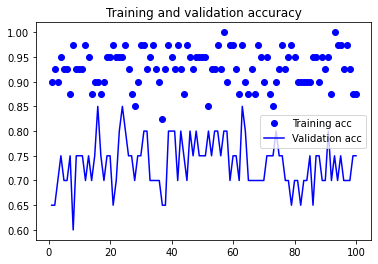

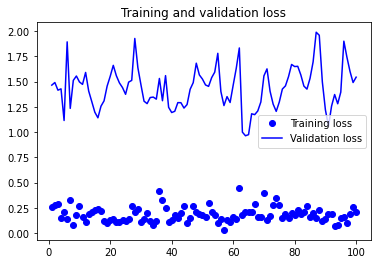

In [30]:
plot_accuracy_and_loss(history)